## R labsession 4
Buriola Lorenzo - 2021860

In [1]:
library(tidyverse)
library(ggthemes)
library(gridExtra)

fig <- function(width, heigth){
  options(repr.plot.width = width, repr.plot.height = heigth)
}

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




## Exercise 1

In [2]:
#This function allow to normalize the probabilities such that they sum up to one
normalize <- function(v){
  v/sum(v)
}

The code asks the color extracted at updates the probabilities until the user types 'end'. All probabilities are saved in a dataframe.

In [3]:
j <- 0:5
P <- rep(1/6, 6)
prob <- P
col <- c("_start")

repeat{
  c <- readline(prompt = "Which color has been extracted? [W][B][end]\n")
  if (c=='W'){
    P <- normalize(j/5 * P)
  }
  else if(c=='B'){
    P <- normalize((5-j)/5 * P)
  }
  else{
    break
  }
  prob <- rbind(prob, P)
  col <- append(col, c)
}

Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
B
Which color has been extracted? [W][B][end]
W
Which color has been extracted? [W][B][end]
end


In [4]:
df <- data.frame(prob)
rnames <- seq(0, nrow(df)-1)
rownames(df) <- rnames
df <- cbind(df, rnames)
df <- cbind(df, col)
cnames <- c('H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'n_sample', 'color')
colnames(df) <- cnames
df

,H0,H1,H2,H3,H4,H5,n_sample,color
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
0,0.1666667,0.16666667,0.166666667,1.666667e-01,1.666667e-01,0.1666667,0,_start
1,0.3333333,0.26666667,0.200000000,1.333333e-01,6.666667e-02,0.0000000,1,B
2,0.4545455,0.29090909,0.163636364,7.272727e-02,1.818182e-02,0.0000000,2,B
3,0.5555556,0.28444444,0.120000000,3.555556e-02,4.444444e-03,0.0000000,3,B
4,0.6384065,0.26149132,0.082737487,1.634321e-02,1.021450e-03,0.0000000,4,B
5,0.7062147,0.23141243,0.054915254,7.231638e-03,2.259887e-04,0.0000000,5,B
6,0.7616378,0.19965879,0.035534974,3.119669e-03,4.874482e-05,0.0000000,6,B
7,0.8068681,0.16921250,0.022587142,1.321973e-03,1.032791e-05,0.0000000,7,B
8,0.8437208,0.14155286,0.014171269,5.529408e-04,2.159925e-06,0.0000000,8,B


Plotting the results

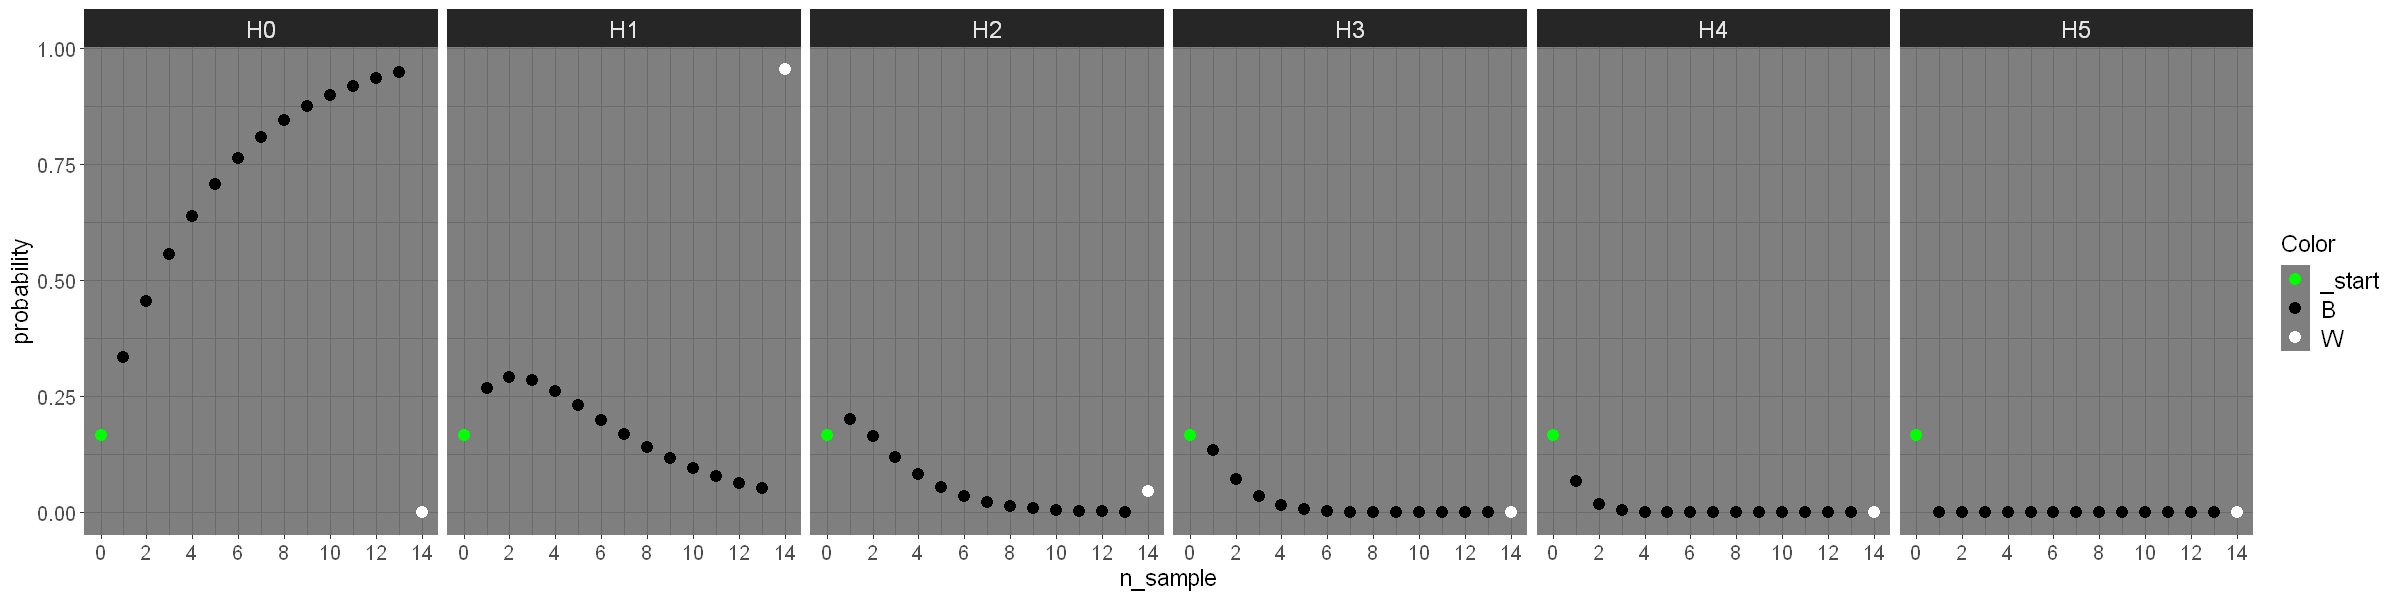

In [5]:
newdf <- df %>% pivot_longer(cols = !c(n_sample, color), 
                             names_to = 'box', values_to = 'probability')

fig(20, 5)
p <- newdf %>%  ggplot(aes(n_sample, probability))
p + geom_point(aes(col = color), size = 3)  + facet_grid(~box) +
  scale_color_manual(name = 'Color', values = c('W' = 'white', 'B' = 'black', '_start' = 'green')) +
  theme_dark() +
  theme(strip.text.x = element_text(size = 14)) +
  theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
  theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
  theme(legend.text = element_text(size = 14), legend.title = element_text(size = 14)) +
  scale_x_continuous(breaks=seq(0, nrow(df), 2))

## Exercise 2

In [6]:
#Fixing a seed
set.seed(1234)
#Choosing the box
j <- 0:5
box <- sample(j, 1)
cat('Choosen box:', box)

Choosen box: 3

In [7]:
#Generating the extraction
N = 100
X <- sample(1:5, N, replace = T)
col <- ifelse(X<=box, "W", "B")

Now we operate similarly with respect to what has been done for the __Exercise 1__ extracting one ball and computing the probabilities.
A dataframe is created.

In [8]:
P <- rep(1/6, 6)
prob <- P
col_extracted <- c('_start')

for (c in col){
    if (c=='W'){
        P <- normalize(j/5 * P)
    }
    else if(c=='B'){
        P <- normalize((5-j)/5 * P)
    }
    prob <- rbind(prob, P)
    col_extracted <- append(col_extracted, c)
}

df <- data.frame(prob)
rnames <- seq(0, nrow(df)-1)
rownames(df) <- rnames
df <- cbind(df, rnames)
df <- cbind(df, col_extracted)
cnames <- c('H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'n_trial', 'color')
colnames(df) <- cnames

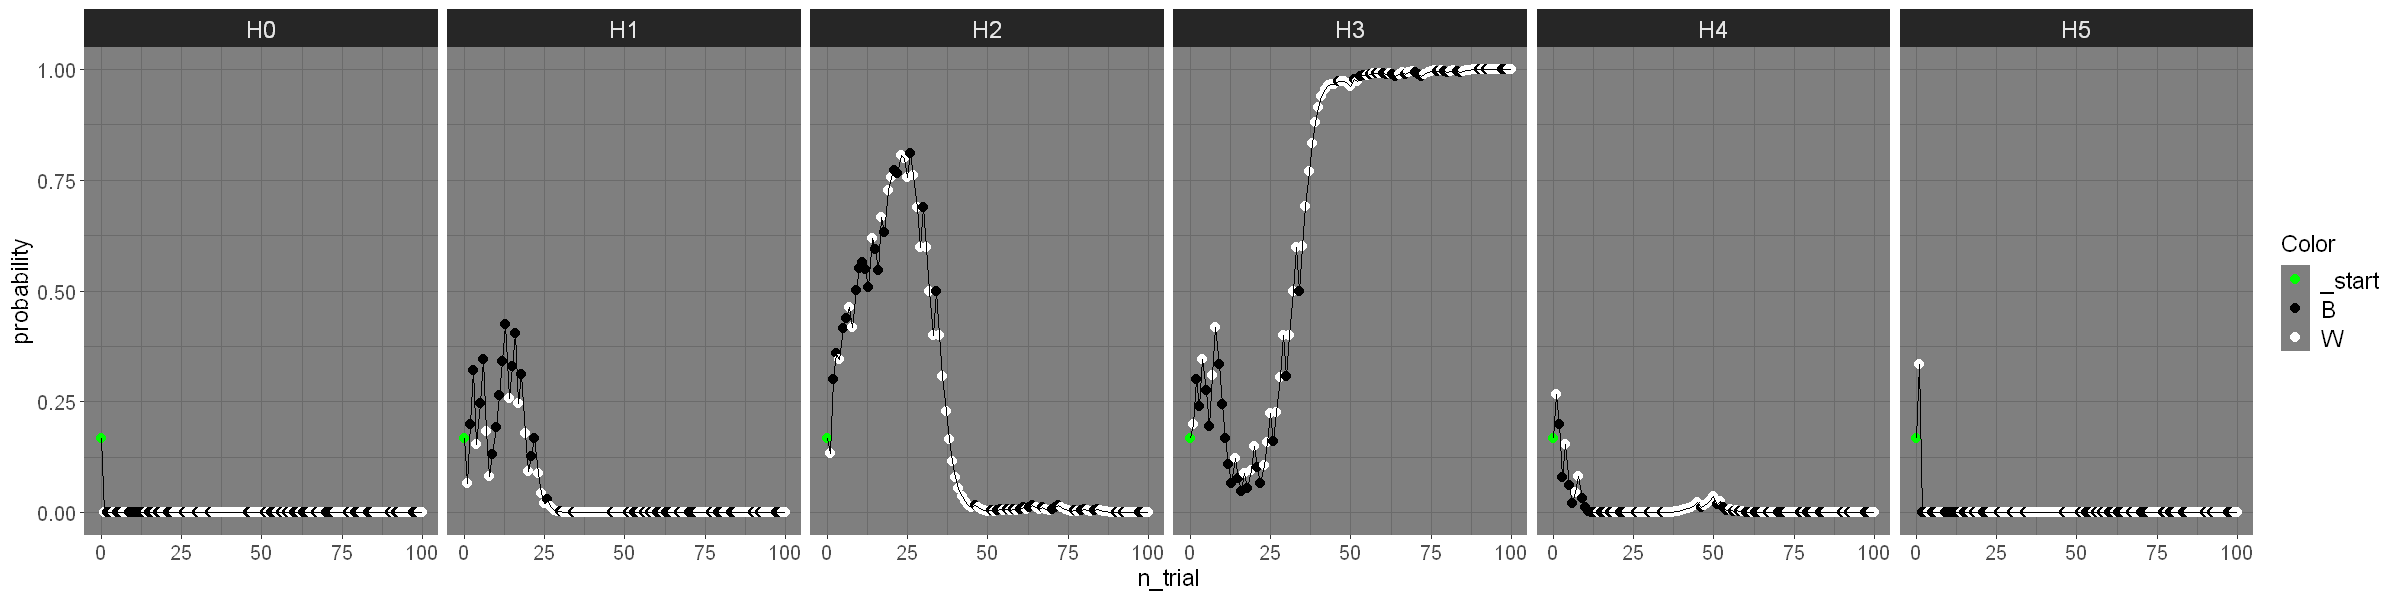

In [9]:
newdf <- df %>% pivot_longer(cols = !c(n_trial, color), 
                             names_to = 'box', values_to = 'probability')

fig(20, 5)
p <- newdf %>%  ggplot(aes(n_trial, probability))
p + geom_point(aes(col = color), size = 2.5) + geom_line(size = 0.3) + facet_grid(~box) +
  scale_color_manual(name = 'Color', values = c('W' = 'white', 'B' = 'black', '_start' = 'green')) +
  theme_dark() +
  theme(strip.text.x = element_text(size = 14)) +
  theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
  theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
  theme(legend.text = element_text(size = 14), legend.title = element_text(size = 14))

In [10]:
n_w <- ifelse(col == 'W', 1, 0)
cat('Perc. extraction: ', sum(n_w)/N*100, '% W', (1-sum(n_w)/N)*100, '% B')

Perc. extraction:  60 % W 40 % B

The final probabilities are:

In [11]:
df[N,1:6]

,H0,H1,H2,H3,H4,H5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
99,0,7.777511e-17,0.00045088,0.9995277,2.137866e-05,0


## Exercise 3

The _Erlang distribution_ $Gamma(m, \beta)$ sampling is built by summming $m$ exponential random variables $\sim Exp(1/\beta)$, using the inverse cdf method.
A comparison with the _rgamma()_ function of _R_ is plotted.

In [12]:
b = 2
m = 5
rerlang <- function(m, b, n){
    u <- matrix(runif(m*n), nrow = n)
    func <- function(v){
        -1/b*log(prod(v))
    } 
    y <- apply(u, 1, func)
}

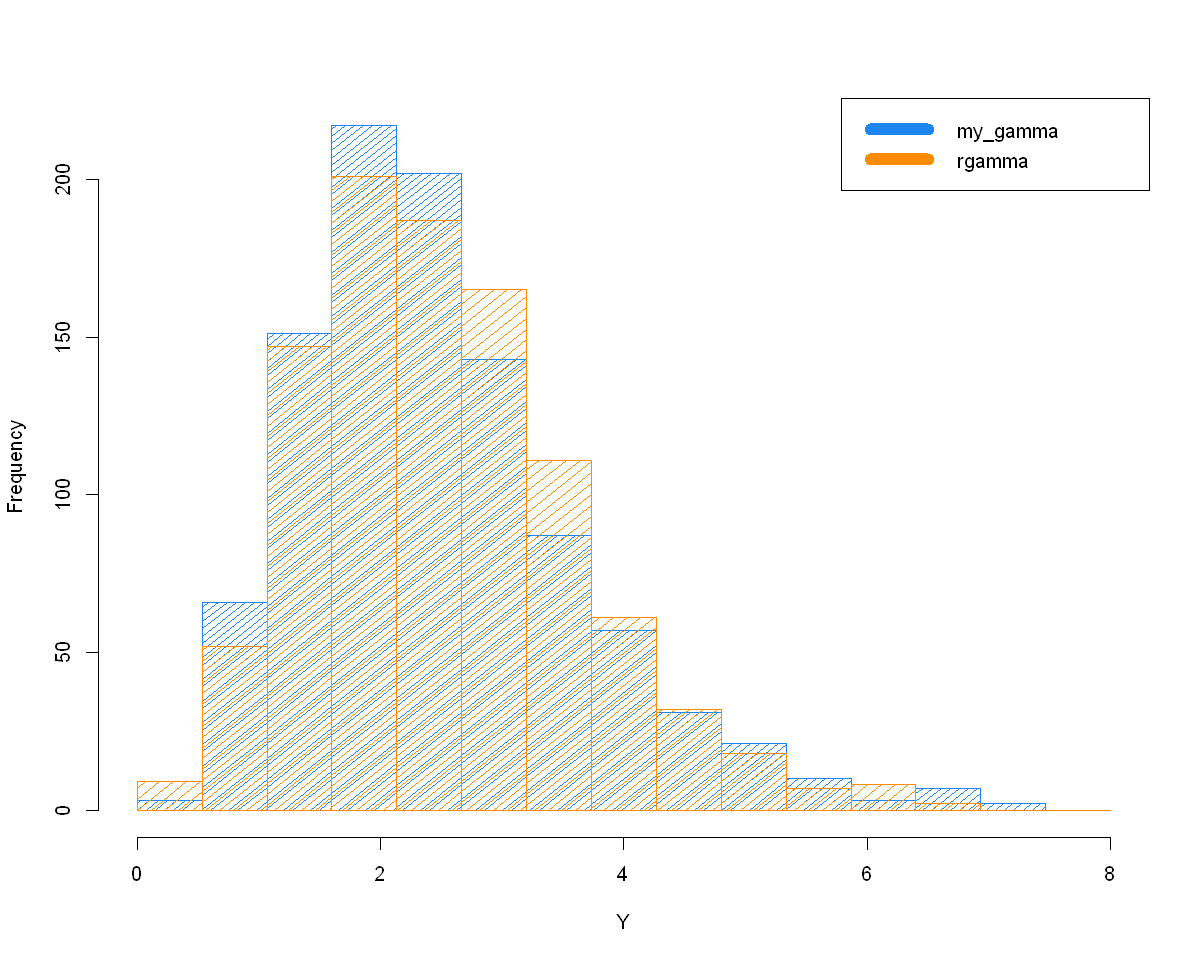

In [13]:
Y <- rerlang(m, b, 1000)
Yt <- rgamma(n = 1000, rate = b, shape = m)
fig(10, 8)
edges <- seq(0, 8, length.out = 16)
hist(Y, breaks = edges, col = 'dodgerblue2', density = 30, main = '')
hist(Yt, breaks = edges, col = 'darkorange', density = 20, add = T)
legend("topright", c("my_gamma", "rgamma"), col=c("dodgerblue2", "darkorange"), lwd=10)

## Exercise 4

In [14]:
set.seed(12)
N <- 1000
Neumanngen <- function(N){
    #Initial sampling (0 was excluded to avoided 9 bit or less numbers)
    n <- sample(1:9, 10, replace = T)
    number <- as.numeric(paste(n, collapse=""))
    vec <- c(number)
    for (i in seq(N)){
        nlist <- unlist(strsplit(as.character(number^2),""))
        t <- (length(nlist)-10)%/%2
        nlistnew <- nlist[-(1:t)][1:10]
        number <- as.numeric(paste(nlistnew, collapse=""))
        #Avoid numbers with less than 6 bits (multiplying them 10 times)
        while (number < 100000){
            number <- number * 10
        }
        vec <- append(vec, number)
    }
    vec
}

ns <- Neumanngen(N)

Let us visualize if the generator is sufficiently random.

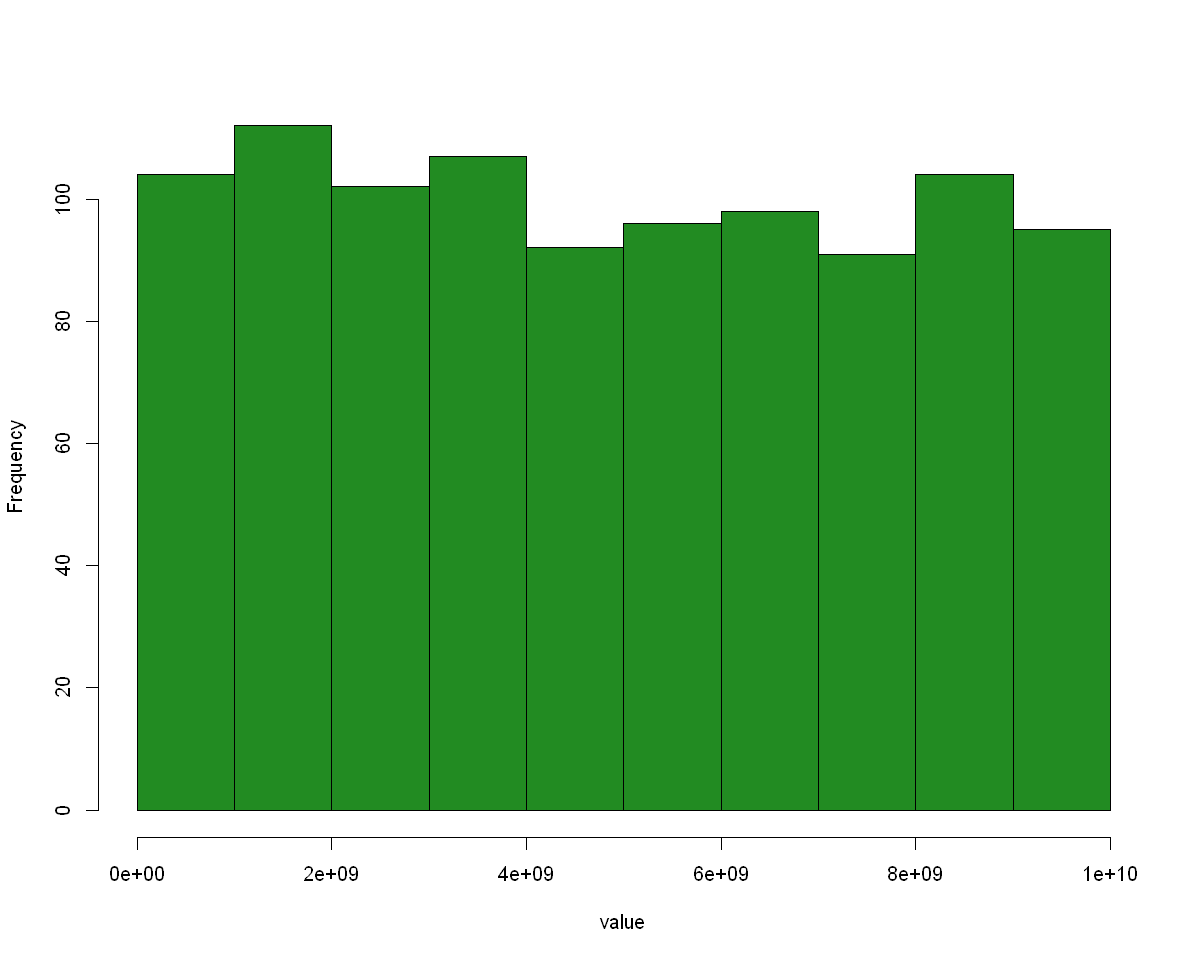

In [15]:
hist(ns, col = 'forestgreen', main = '', xlab = 'value')

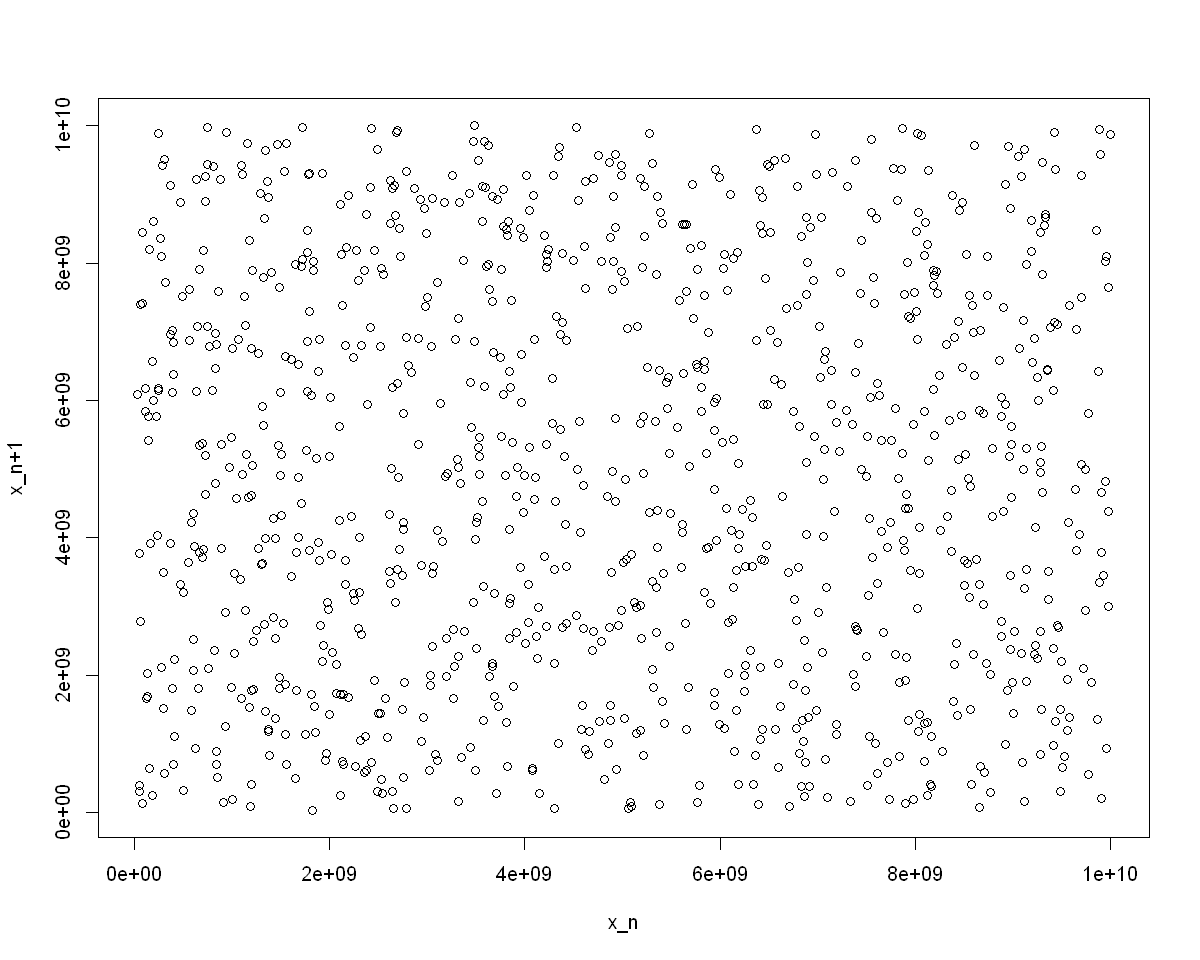

In [16]:
x <- ns[-length(ns)]
y <- ns[-1]
plot(x,y, xlab = 'x_n', ylab = 'x_n+1')

Plotting the $x_n$ point vs the $x_{n+1}$ no evident correlations pop out.